<a href="https://colab.research.google.com/github/will-cotton4/DS-Unit-2-Sprint-2-Regression/blob/master/polynomial_log_linear_regression_assignment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Intermediate Linear Regression Practice

## Use a Linear Regression model to get the lowest RMSE possible on the following dataset:

[Dataset Folder](https://github.com/ryanleeallred/datasets/tree/master/Ames%20Housing%20Data)

[Raw CSV](https://raw.githubusercontent.com/ryanleeallred/datasets/master/Ames%20Housing%20Data/train.csv)

## Your model must include (at least):
- A log-transformed y variable
- Two polynomial features
- One interaction feature
- 10 other engineered features

What is the lowest Root-Mean-Squared Error that you are able to obtain? Share your best RMSEs in Slack!

Notes:

There may be some data cleaning that you need to do on some features of this dataset. Linear Regression will only accept numeric values and will not accept

Note* There may not be a clear candidate for an interaction term in this dataset. Include one anyway, sometimes it's a good practice for predictive modeling feature engineering in general. 

In [0]:
import pandas as pd
from sklearn.model_selection import train_test_split
ames_url = 'https://raw.githubusercontent.com/ryanleeallred/datasets/master/Ames%20Housing%20Data/train.csv'

ames = pd.read_csv(ames_url)
ames_train, ames_test = train_test_split(ames)
ames_train = ames_train.reset_index()
ames_test = ames_test.reset_index()

In [29]:
ames_train.isna().sum().sort_values(ascending=False).head(10)

PoolQC          1089
MiscFeature     1057
Alley           1026
Fence            888
FireplaceQu      526
LotFrontage      195
GarageCond        59
GarageType        59
GarageYrBlt       59
GarageFinish      59
dtype: int64

In [0]:
#Drop sparse columns
ames_train = ames_train.drop(columns=['PoolQC', 'MiscFeature', 'Alley', 
                                      'Fence', 'FireplaceQu', 'Id'])

In [31]:
ames_train.columns[:-1]

Index(['index', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'LotShape', 'LandContour', 'Utilities', 'LotConfig', 'LandSlope',
       'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle',
       'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd', 'RoofStyle',
       'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'MasVnrArea',
       'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond',
       'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1', 'BsmtFinType2',
       'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating', 'HeatingQC',
       'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF',
       'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath',
       'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual', 'TotRmsAbvGrd',
       'Functional', 'Fireplaces', 'GarageType', 'GarageYrBlt', 'GarageFinish',
       'GarageCars', 'GarageArea', 'GarageQual', 'GarageCond', 'PavedDrive',
       'WoodDeckSF', 'Ope

In [32]:
ames_train.dtypes

index              int64
MSSubClass         int64
MSZoning          object
LotFrontage      float64
LotArea            int64
Street            object
LotShape          object
LandContour       object
Utilities         object
LotConfig         object
LandSlope         object
Neighborhood      object
Condition1        object
Condition2        object
BldgType          object
HouseStyle        object
OverallQual        int64
OverallCond        int64
YearBuilt          int64
YearRemodAdd       int64
RoofStyle         object
RoofMatl          object
Exterior1st       object
Exterior2nd       object
MasVnrType        object
MasVnrArea       float64
ExterQual         object
ExterCond         object
Foundation        object
BsmtQual          object
                  ...   
BsmtFullBath       int64
BsmtHalfBath       int64
FullBath           int64
HalfBath           int64
BedroomAbvGr       int64
KitchenAbvGr       int64
KitchenQual       object
TotRmsAbvGrd       int64
Functional        object


In [33]:
ames_train.shape

(1095, 76)

In [0]:
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer



features = ames_train.select_dtypes(
    include=['float64', 'int64']).columns
target = 'SalePrice'
x = SimpleImputer().fit_transform(ames_train.loc[:, features])

y = ames_train.loc[:, target].values

x = StandardScaler().fit_transform(x)

In [35]:
len(features)

38

In [0]:
from sklearn.decomposition import PCA

pca = PCA(n_components = 30)

principalComponents = pca.fit_transform(x)

In [0]:
scaled_var_exp = pca.explained_variance_/sum(pca.explained_variance_)

In [38]:
scaled_var_exp

array([0.2116329 , 0.08627758, 0.06874854, 0.05693168, 0.03915176,
       0.03360888, 0.03218968, 0.03139207, 0.03104792, 0.03020683,
       0.02919323, 0.02761678, 0.02723679, 0.02688356, 0.02549563,
       0.02479989, 0.02316479, 0.02244056, 0.02202994, 0.02046078,
       0.01956674, 0.0178217 , 0.01656197, 0.01553659, 0.01541189,
       0.01139527, 0.01076775, 0.00829842, 0.00735174, 0.00677815])

In [0]:
labels = ['pc' + str(num) for num in range(1,31)]

<BarContainer object of 30 artists>

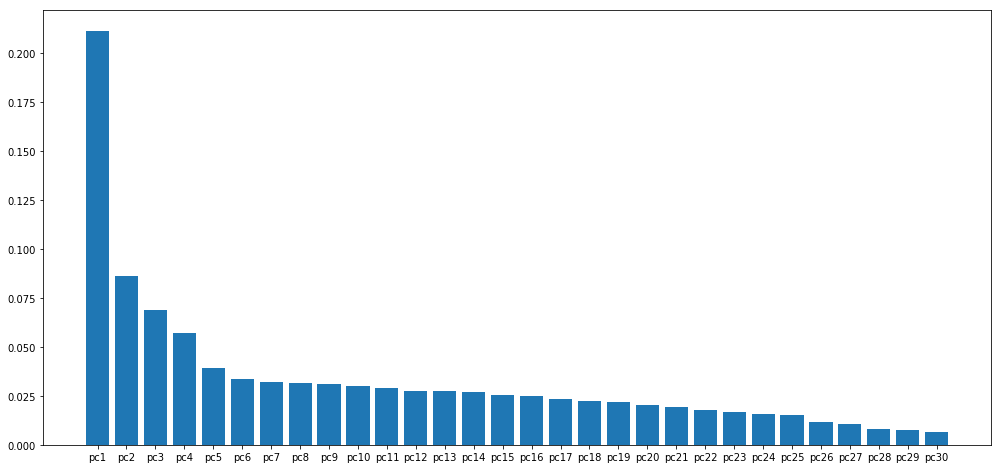

In [40]:
import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np

fig = plt.figure(figsize = (17,8))
fig.add_axes()
ax1=fig.add_subplot(111)
ax1.bar(x=labels, height=scaled_var_exp)

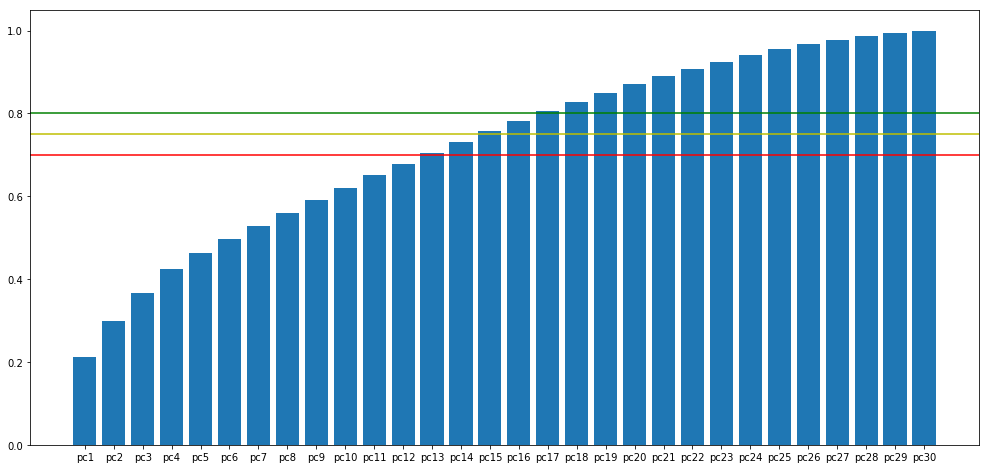

In [41]:
j=0
cum_varex=np.zeros(30)
while j < len(scaled_var_exp):
  cum_varex[j] = sum(scaled_var_exp[:j+1])
  j+=1
  
fig = plt.figure(figsize = (17,8))
fig.add_axes()
ax2=fig.add_subplot(111)
ax2.bar(x=labels, height=cum_varex)#, cmap = 'Greens')
ax2.axhline(0.7, color='r')
ax2.axhline(0.75, color='y')
ax2.axhline(0.8, color='g')

In [0]:
principalComponentsDF = pd.DataFrame(data = principalComponents, columns = labels)

In [0]:
principalComponentsDF = pd.DataFrame(data = principalComponents, columns = labels)
top_PCA_labels = principalComponentsDF.columns[:13]
top_PCA = principalComponentsDF[top_PCA_labels]
ames_train[top_PCA_labels] = top_PCA

In [0]:
ames_train[top_PCA_labels] = top_PCA

In [45]:
ames_train.columns

Index(['index', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'LotShape', 'LandContour', 'Utilities', 'LotConfig', 'LandSlope',
       'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle',
       'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd', 'RoofStyle',
       'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'MasVnrArea',
       'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond',
       'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1', 'BsmtFinType2',
       'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating', 'HeatingQC',
       'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF',
       'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath',
       'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual', 'TotRmsAbvGrd',
       'Functional', 'Fireplaces', 'GarageType', 'GarageYrBlt', 'GarageFinish',
       'GarageCars', 'GarageArea', 'GarageQual', 'GarageCond', 'PavedDrive',
       'WoodDeckSF', 'Ope

In [0]:
# Create interaction terms:
from sklearn.preprocessing import PolynomialFeatures
X = ames_train[['LotArea', 'YearBuilt']]
interaction = PolynomialFeatures(degree=2, include_bias=False, interaction_only=True)
X_inter = interaction.fit_transform(X)
ames_train['layb_int'] = (X_inter.T[2])

In [0]:
ames_train['log_area'] = ames_train['LotArea'].apply(np.log)

In [0]:
# Finally: make the model with the good stuff:
features = ['LotArea', 'log_area', 'layb_int', 'YearBuilt', 'YrSold']
features += (list(top_PCA_labels))
# features = (list(top_PCA_labels))
X = ames_train[features]
y = ames_train['SalePrice']

In [49]:
X.isnull().sum()

LotArea      0
log_area     0
layb_int     0
YearBuilt    0
YrSold       0
pc1          0
pc2          0
pc3          0
pc4          0
pc5          0
pc6          0
pc7          0
pc8          0
pc9          0
pc10         0
pc11         0
pc12         0
pc13         0
dtype: int64

In [50]:
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import LinearRegression
regr = LinearRegression()

model = regr.fit(X,y)
y_pred = model.predict(X)

print("R^2 score:", model.score(X,y))
print("RMSE:", np.sqrt(mean_squared_error(y, y_pred)))

R^2 score: 0.8760618207265816
RMSE: 28371.613926806185


In [51]:
print("R^2 score:", model.score(X,y))
print("RMSE:", np.sqrt(mean_squared_error(y, y_pred)))

R^2 score: 0.8760618207265816
RMSE: 28371.613926806185


In [52]:
#Baseline for comparison:
mean_vec = [y.mean() for i in range(len(y_pred))]
print("RMSE:", np.sqrt(mean_squared_error(y, mean_vec)))

RMSE: 80590.06119523507


In [0]:
#Not great... maybe we can make it better with categorical encoding:

def good_road(string):
  if string == 'Pave':
    return 0
  else:
    return 1
ames_train['good_road'] = ames_train['Street'].apply(good_road)

def util(string):
  if string == 'AllPub':
    return 4
  elif string == 'NoSewr':
    return 3
  elif string == 'NoSeWa':
    return 2
  elif string == 'ELO':
    return 1
  
ames_train['util'] = ames_train['Utilities'].apply(util)

In [0]:
nbhd_median = ames_train.groupby('Neighborhood')['SalePrice'].agg(np.median).to_dict()
ames_train['nbhd_median'] = ames_train['Neighborhood'].apply(lambda x: nbhd_median[x])

In [0]:
# Create interaction terms:
from sklearn.preprocessing import PolynomialFeatures
X = ames_train[['LotArea', 'YrSold']]
interaction = PolynomialFeatures(degree=2, include_bias=False, interaction_only=True)
X_inter = interaction.fit_transform(X)
ames_train['lays_int'] = (X_inter.T[2])

In [56]:
features = ['LotArea', 'log_area', 'layb_int', 'lays_int', 'YearBuilt', 
            'YrSold', 'util', 'good_road', 'nbhd_median',]
features += (list(top_PCA_labels))
# features = (list(top_PCA_labels))
X = ames_train[features]
y = ames_train['SalePrice']
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import LinearRegression

regr = LinearRegression()

model = regr.fit(X,y)
y_pred = model.predict(X)

print("R^2 score:", model.score(X,y))
print("RMSE:", np.sqrt(mean_squared_error(y, y_pred)))

R^2 score: 0.8849813759282181
RMSE: 27331.632308288266


In [0]:
# # Try new PCA:

# features = ['LotArea', 'log_area', 'layb_int', 'lays_int', 'YearBuilt', 
#             'YrSold', 'util', 'good_road', 'nbhd_median',]
# features += (list(top_PCA_labels))
# # features = (list(top_PCA_labels))
# X = ames_train[features]
# y = ames_train['SalePrice']
# from sklearn.metrics import mean_squared_error
# from sklearn.linear_model import LinearRegression

# regr = LinearRegression()

# model = regr.fit(X,y)
# y_pred = model.predict(X)

# print("R^2 score:", model.score(X,y))
# print("RMSE:", np.sqrt(mean_squared_error(y, y_pred)))

# Doesn't work great.

In [0]:
# Add interactive variables from PCA:

from sklearn.preprocessing import PolynomialFeatures
X = ames_train[['pc1', 'pc2']]
interaction = PolynomialFeatures(degree=2, include_bias=False, interaction_only=True)
X_inter = interaction.fit_transform(X)
ames_train['1/2'] = (X_inter.T[2])

X = ames_train[['pc2', 'pc3']]
interaction = PolynomialFeatures(degree=2, include_bias=False, interaction_only=True)
X_inter = interaction.fit_transform(X)
ames_train['2/3'] = (X_inter.T[2])

X = ames_train[['pc1', 'pc3']]
interaction = PolynomialFeatures(degree=2, include_bias=False, interaction_only=True)
X_inter = interaction.fit_transform(X)
ames_train['1/3'] = (X_inter.T[2])


In [59]:
features = ['LotArea', 'log_area', 'layb_int', 'lays_int', 'YearBuilt', 
            'YrSold', 'util', 'good_road', 'nbhd_median', '1/2', '2/3', '1/3']
features += (list(top_PCA_labels))
# features = (list(top_PCA_labels))
X = ames_train[features]
y = ames_train['SalePrice']
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import LinearRegression

regr = LinearRegression()

model = regr.fit(X,y)
y_pred = model.predict(X)

print("R^2 score:", model.score(X,y))
print("RMSE:", np.sqrt(mean_squared_error(y, y_pred)))

R^2 score: 0.8950066478919231
RMSE: 26113.33777427591


In [0]:
#Add ALL the interactives:
X = ames_train[top_PCA_labels[:5]]
interaction = PolynomialFeatures(degree = 2, interaction_only = True)

X_inter = interaction.fit_transform(X)

# Stretch Goals

- Write a blog post explaining one of today's topics.
- Find a new regression dataset from the UCI machine learning repository and use it to test out your new modeling skillz.
 [ - UCI Machine Learning Repository - Regression Datasets](https://)
- Make a list for yourself of common feature engineering techniques. Browse Kaggle kernels to learn more methods.
- Try and make the ultimate model with this dataset. clean as many features as possible, engineer the most sensible features as possible and see how accurate of a prediction you can make. 
- Learn about the "Dummy Variable Trap" and how it applies to linear regression modeling.
- Learning about using linear regression to model time series data